In [ ]:
from class_magnesium_not_drop_na import *

In [2]:
m = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'],
             model = RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='gini', 
             max_depth = 20, min_samples_leaf=75),  with_groups = False)

In [49]:
test = []
train = []
cnf = []
ratios = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 1.0] 

for i in ratios:
    print('Ratio - %0.1f' % i)
    rus = RandomUnderSampler(ratio = i, random_state=42)
    x, y = rus.fit_sample(m.x, m.y)
    data = m.fit_predict(5, 0.3, False, False, False, x = x, y = y)
    train.append(data['train score'])
    test.append(data['test score'])
    cnf.append(data['confusion'][1])

Ratio - 0.3

Number of sites:  6153
Portion of sites:  0.230769230769
Average score:  0.682763138101
Last score:  0.769230769231
Ratio - 0.4

Number of sites:  6153
Portion of sites:  0.285707652303
Average score:  0.684406562922
Last score:  0.716428306092
Ratio - 0.5

Number of sites:  6153
Portion of sites:  0.333333333333
Average score:  0.684217559192
Last score:  0.681076981418
Ratio - 0.6

Number of sites:  6153
Portion of sites:  0.375
Average score:  0.683368012501
Last score:  0.665529010239
Ratio - 0.7

Number of sites:  6153
Portion of sites:  0.411764705882
Average score:  0.682621105276
Last score:  0.665662852172
Ratio - 0.8

Number of sites:  6153
Portion of sites:  0.444420368364
Average score:  0.682053671917
Last score:  0.670205850488
Ratio - 0.9

Number of sites:  6153
Portion of sites:  0.473672055427
Average score:  0.681410302402
Last score:  0.659199384142
Ratio - 0.9

Number of sites:  6153
Portion of sites:  0.487173396675
Average score:  0.680814642359
Last 

### Save data

In [53]:
h = open('outputs/balanced_test_ratio.txt', 'w')
h.write(' '.join([str(i) for i in test]))
h.close()

h = open('outputs/balanced_train_ratio.txt', 'w')
h.write(' '.join([str(i) for i in train]))
h.close()

h = open('outputs/balanced_cnf_ratio.txt', 'w')
h.write('\n'.join([' '.join([str(j) for j in i]) for i in cnf]))
h.close()

### Upload data

In [54]:
# Чтобы не прогонять расчеты, написанные выше каждый раз, я сохранила эти данные, 
# поэтому сейчас я могу работать с сохраненными данными.

test = [float(i) for i in open('outputs/balanced_test_ratio.txt').read().split()]
train = [float(i) for i in open('outputs/balanced_train_ratio.txt').read().split()]
cnf = open('outputs/balanced_cnf_ratio.txt').read().split('\n')
cnf =[np.array([float(j) for j in re.split('\[|\]|\s', i) if len(j)>0]).reshape(2,2) for i in cnf]   

ratios = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 1.0] 

### Plots

In [55]:
def plot_results(parametres, train, test, cnf):
    ax = plt.figure(figsize = (15,10)).add_subplot(211)
    ax.plot(parametres, test, color = 'teal', label = 'Mean test accuracy')
    ax.scatter(parametres, test, color = 'teal')
    ax.plot(parametres, train, color = 'purple', label = 'Mean train accuracy')
    ax.scatter(parametres, train, color = 'purple')
    ax.plot(parametres, [i[0,0] for i in cnf], '-.',color = 'grey', label = 'TN')
    ax.scatter(parametres, [i[0,0] for i in cnf], color = 'grey')
    ax.plot(parametres, [i[1,1] for i in cnf], '--',color = 'darkgrey', label = 'TP')
    ax.scatter(parametres, [i[1,1] for i in cnf],  color = 'darkgrey')
    plt.legend()
    plt.xlabel('Ratio: sites/non-sites')
    plt.ylabel('Accuracy')
    plt.title('Accuracy scores', fontsize = 12)
    
    ax = plt.figure(figsize = (15,10)).add_subplot(212)
    ax.plot(parametres, test, color = 'teal', label = 'Mean test accuracy')
    ax.scatter(parametres, test, color = 'teal')
    ax.plot(parametres, train, color = 'purple', label = 'Mean train accuracy')
    ax.scatter(parametres, train, color = 'purple')
    plt.legend()
    plt.xlabel('Ratio: sites/non-sites')
    plt.ylabel('Accuracy')
    plt.title('Accuracy scores', fontsize = 12)
    plt.show()

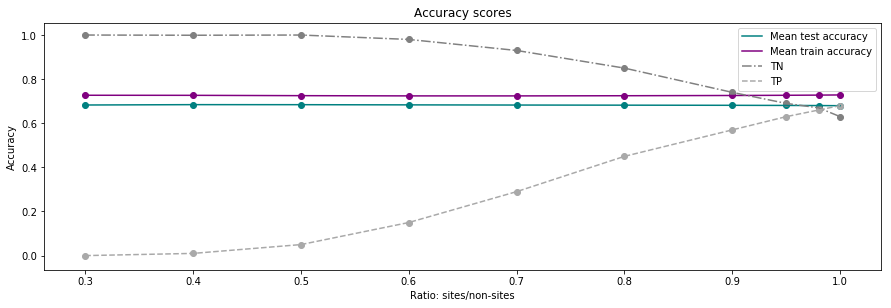

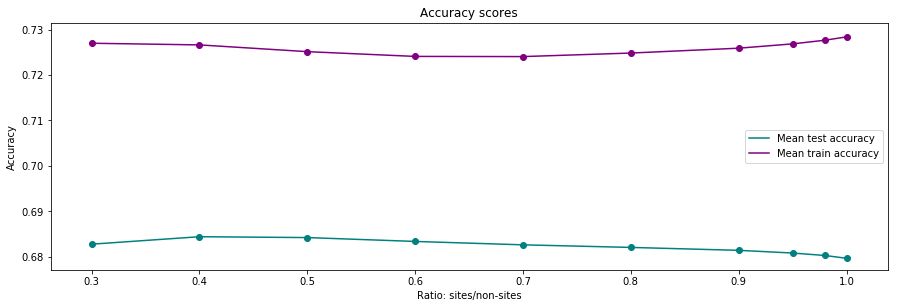

In [56]:
plot_results(ratios, train, test, cnf)

### Results

Before:  (88877, 361)
After:  (41438, 361)

Number of sites:  6153
Portion of sites:  0.494932432432
Average score:  0.664457314457
Last score:  0.668597168597


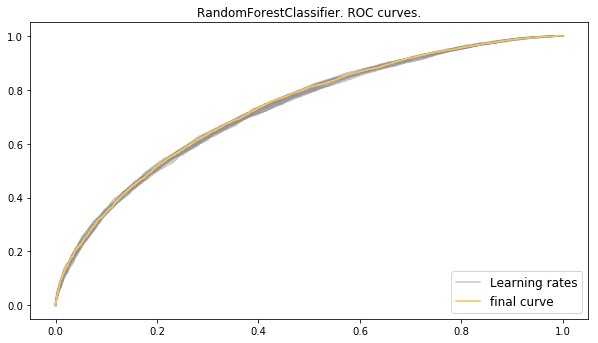

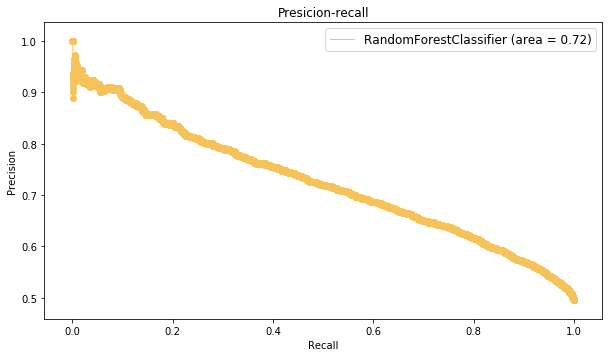

Confusion matrix, without normalization
[[4162 2117]
 [2003 4150]]
Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.33  0.67]]


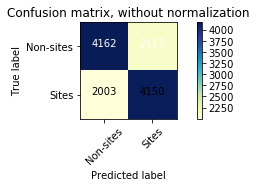

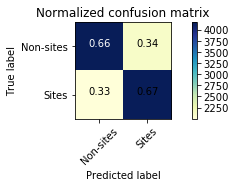

In [11]:
m = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'],
             model = RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='gini', 
             max_depth = 20, min_samples_leaf=75, oob_score=True),  with_groups = False)
data = m.compute(n_splits = 15, test_size = 0.3, plots = True, reduce_features = False, balanced = True, ratio = 0.98)

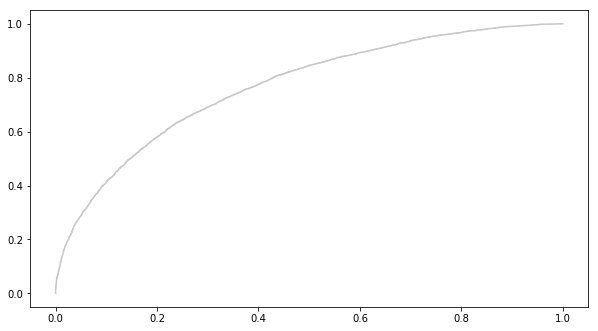

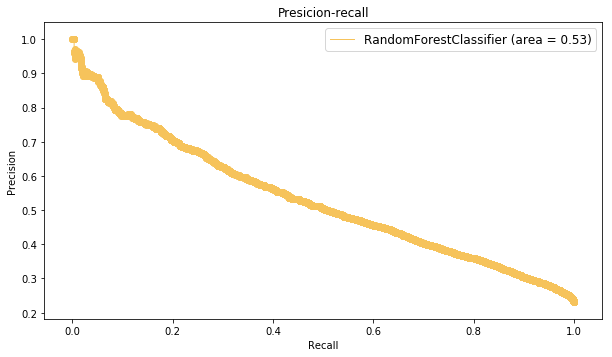

Confusion matrix, without normalization
[[13607  6904]
 [ 1692  4461]]
Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.27  0.73]]


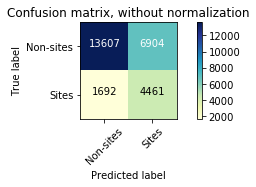

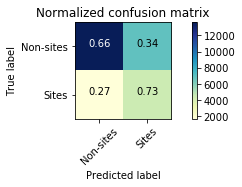

In [12]:
data_predict = m.predict("test files/set_minresol_N_5/without groups/test_1.csv")

In [13]:
y_pred = data_predict["prediction"]
y = data_predict["y"] 
y_prob = data_predict["probability"]

In [35]:
def plot_confusion_matrix_(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.YlGnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    classes = ['Non-sites', 'Sites']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if (cm[i, j] > thresh) and (i == 0) else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


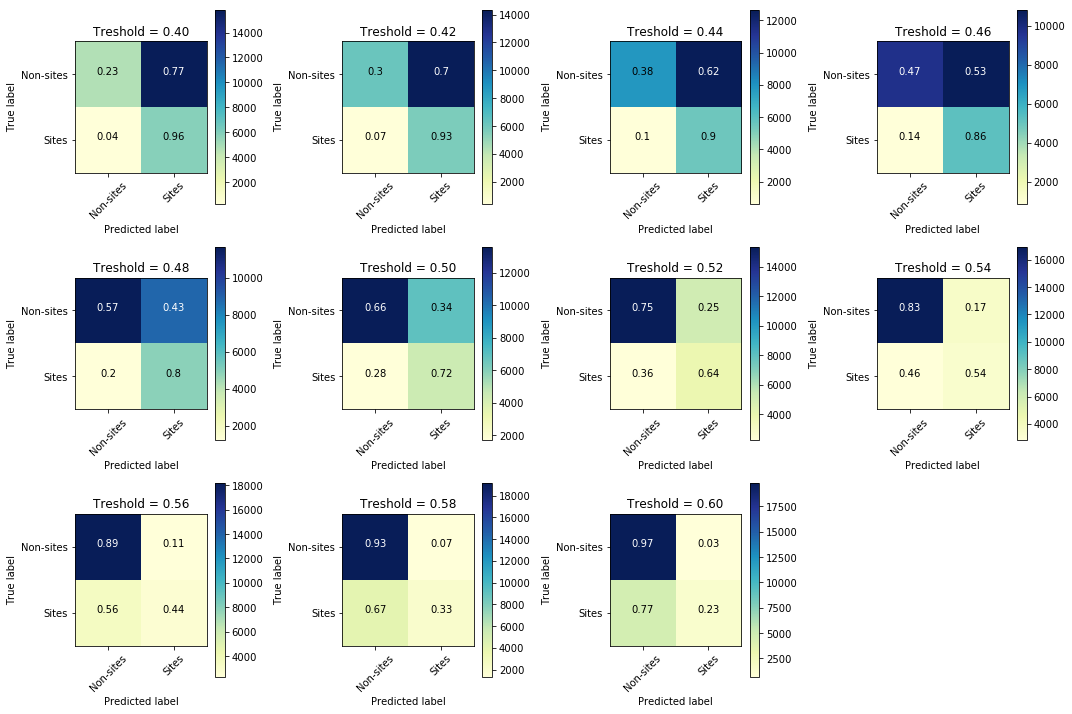

In [37]:
 np.set_printoptions(precision=2)
treshholds = [0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6]
fig = plt.figure(figsize = (15, 10))
for j,i in enumerate(treshholds):
    y_pred = np.zeros_like(y_prob)
    y_pred[y_prob > i] = 1
    cnf_matrix = confusion_matrix(y, y_pred)
    fig.add_subplot(3,4,j+1)
    plot_confusion_matrix_(cnf_matrix, normalize=True,title='Treshold = %.2f' % i)

plt.show()

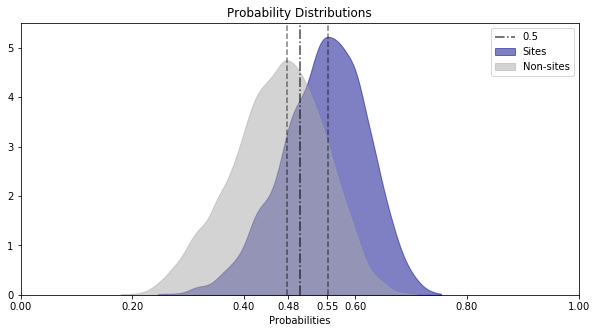

In [72]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(10,5))
kde1 = gaussian_kde(y_prob[y == 1])
x1 = linspace(np.min(y_prob[y == 1]),np.max(y_prob[y == 1]),500)
plt.fill_between(x1,kde1(x1),0, color='darkblue', alpha = 0.5, label = 'Sites')
kde2 = gaussian_kde(y_prob[y == 0])
x2 = linspace(np.min(y_prob[y == 0]),np.max(y_prob[y == 0]),500)
plt.fill_between(x2,kde2(x2), 0, color='darkgrey', alpha = 0.5, label = 'Non-sites')
plt.axvline(x1[np.argmax(kde1(x1))], color='black', linestyle='--', alpha = 0.5) 
plt.axvline(x2[np.argmax(kde2(x2))], color='black', linestyle='--', alpha = 0.5) 
plt.axvline(0.5, color='black', linestyle='-.', alpha = 0.7, label = '0.5') 
plt.xlim([0,1])
plt.ylim([0,5.5])
plt.xticks(list(plt.xticks()[0])+[round(x1[np.argmax(kde1(x1))],2), round(x2[np.argmax(kde2(x2))],2)])
plt.legend()
plt.title('Probability Distributions')
plt.xlabel('Probabilities')
plt.show()

### Попытка скластеризовать фичи

In [158]:
from sklearn.cluster import FeatureAgglomeration
m = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'],
             model = RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='gini', 
             max_depth = 20, min_samples_leaf=75, oob_score=True),  with_groups = False)
fag = FeatureAgglomeration(n_clusters  = 20)
x_new = fag.fit_transform(m.x, m.y)
x_new.shape
fag.labels_

array([ 9,  9, 15,  9,  5, 18, 12,  3,  6,  5,  5,  6,  3,  9,  9, 12,  1,
        0, 17,  0,  6,  0,  9,  5, 12,  5, 12, 12,  3,  5, 14, 12,  3,  6,
        5,  5,  6,  3,  9,  9, 12,  1,  0, 10,  0,  0,  0,  9,  5, 12,  5,
       12, 12,  3,  5, 16, 12,  3,  6,  5,  5,  6,  3,  9,  9, 12,  1,  4,
       19,  4,  0,  4,  9,  5, 12,  5, 12, 12,  3,  5,  8, 12,  3,  6,  5,
        5,  6,  3,  9,  9, 12,  1,  2, 11,  2,  4,  2,  9,  5, 12,  5, 12,
       12,  3,  5,  7, 12,  3,  6,  5,  5,  6,  3,  9,  9, 12,  1,  2, 13,
        2,  2,  2,  9,  5, 12,  5, 12, 12,  3,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

In [159]:
features_classes = np.zeros_like(m.features[:-1])
features_classes[:4] = 0 # общие данные                               red
features_classes[4:149] = 1 # нуклеотид и соседи, торсионные углы     blue
features_classes[149:354] = 2 # спаривания                            dark red
features_classes[354:] = 3 # вторичная структура                      yellow
#m.features[149:354] = 2 # торсионные углы

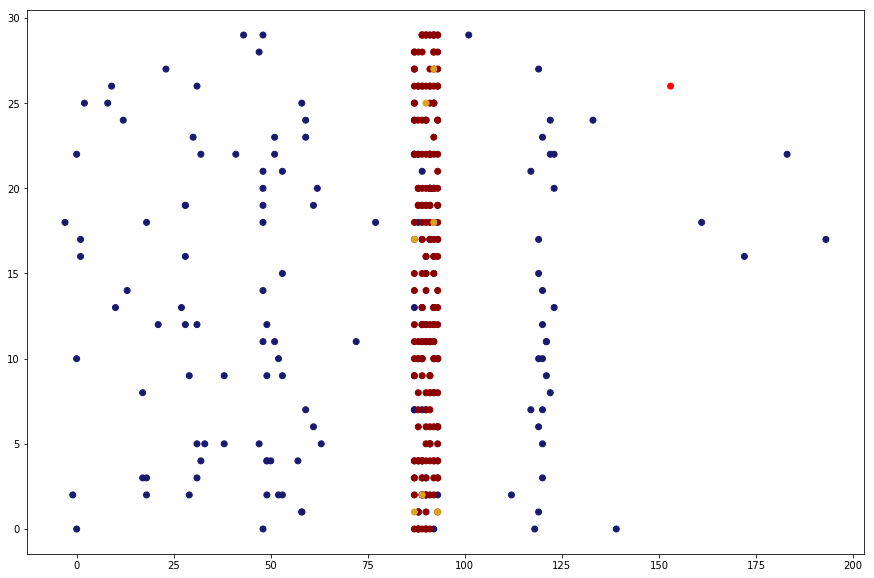

In [160]:
from random import sample
labels = fag.labels_ * 10
delta = (np.array([sample(list(range(7)), 1) for  i in features_classes]) - 3).reshape(1,-1)[0]
height = np.array([sample(list(range(30)),1) for  i in features_classes]).reshape(1,-1)[0]
base_colors = ['red', 'midnightblue','darkred', 'goldenrod']
colors = [base_colors[int(i)] for i in features_classes]

plt.figure(figsize=(15,10))
plt.scatter(labels+delta, height, color = colors)
plt.show()

In [145]:
np.array(m.features[:-1])[fag.labels_ == 12]    # фичи, которые составляют столбик в районе 120

array(['gammam2', 'splaym2', 'v2m2', 'v4m2', 'tmm2', 'gammam1', 'splaym1',
       'v2m1', 'v4m1', 'tmm1', 'gamma', 'splay', 'v2', 'v4', 'tm',
       'gamma1', 'splay1', 'v21', 'v41', 'tm1', 'gamma2', 'splay2', 'v22',
       'v42', 'tm2'], 
      dtype='<U13')